In [1]:
# prompt: mount drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


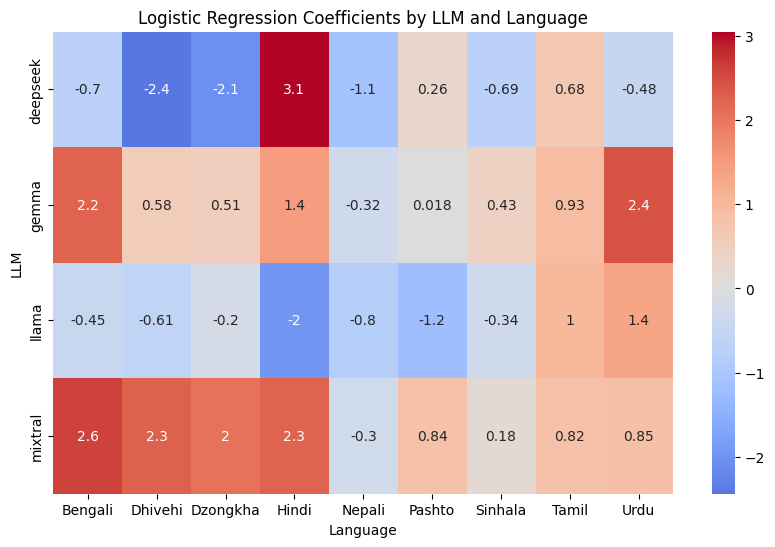

         LLM  Language  Coefficient   P-Value
0   deepseek   Bengali    -0.700826  0.733084
1   deepseek   Dhivehi    -2.441570  0.077406
2   deepseek  Dzongkha    -2.055962  0.021201
3   deepseek     Hindi     3.052641  0.199654
4   deepseek    Nepali    -1.102977  0.251236
5   deepseek    Pashto     0.264382  0.804115
6   deepseek   Sinhala    -0.685723  0.480854
7   deepseek     Tamil     0.680277  0.612044
8   deepseek      Urdu    -0.476418  0.770823
9      gemma   Bengali     2.237900  0.193817
10     gemma   Dhivehi     0.578052  0.657170
11     gemma  Dzongkha     0.512055  0.617022
12     gemma     Hindi     1.443945  0.426603
13     gemma    Nepali    -0.319729  0.721875
14     gemma    Pashto     0.017653  0.986382
15     gemma   Sinhala     0.433859  0.651384
16     gemma     Tamil     0.926686  0.473745
17     gemma      Urdu     2.412018  0.107905
18     llama   Bengali    -0.451736  0.797616
19     llama   Dhivehi    -0.614694  0.757125
20     llama  Dzongkha    -0.20147

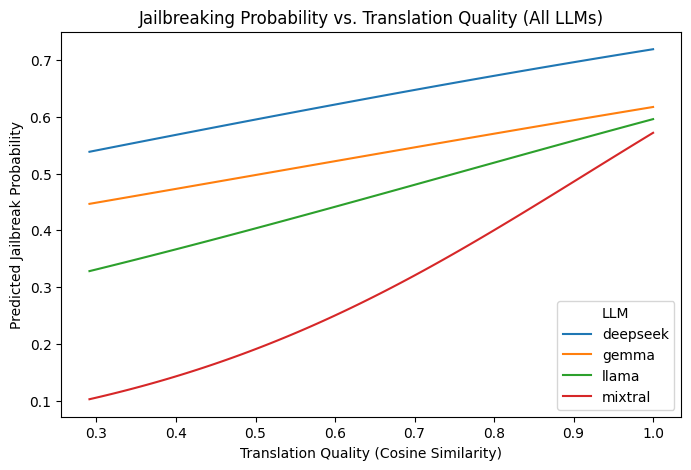

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

# 1️⃣ Load the dataset

df = pd.read_csv("/content/drive/MyDrive/UBC CS/CPSC 538P Project (Computer Security)/Evaluation/Qwen/final_merged_labels.csv")
column_mapping = {
    "model": "LLM",
    "language_code": "Language",
    "cosine_similarity": "Translation_Quality",
    "label": "Jailbreak_Success",
    # Add more mappings as needed
}

# Rename the columns
df.rename(columns=column_mapping, inplace=True)
df = df[df["Language"] != "en"]
languages = {
     'hi': 'India (Hindi)',
     'ur': 'Pakistan (Urdu)',
     'bn': 'Bangladesh (Bengali)',
     'ne': 'Nepal (Nepali)',
     'si': 'Sri Lanka (Sinhala)',
     'ta': 'Sri Lanka (Tamil)',
    'dz': 'Bhutan (Dzongkha)',
    'dv': 'Maldives (Dhivehi)',
     'ps': 'Afghanistan (Pashto)'
}
languages = {
    'hi': 'Hindi',
    'ur': 'Urdu',
    'bn': 'Bengali',
    'ne': 'Nepali',
    'si': 'Sinhala',
    'ta': 'Tamil',
    'dz': 'Dzongkha',
    'dv': 'Dhivehi',
    'ps': 'Pashto',
}
df['Language'] = df['Language'].map(languages)
# Ensure your CSV has: ['LLM', 'Language', 'Translation_Quality', 'Jailbreak_Success']
# 2️⃣ Fit logistic regression for each (LLM, Language)
results = []
for (llm, lang), group in df.groupby(["LLM", "Language"]):
    model = smf.logit("Jailbreak_Success ~ Translation_Quality", data=group).fit(disp=0)
    coef, pval = model.params["Translation_Quality"], model.pvalues["Translation_Quality"]
    results.append({"LLM": llm, "Language": lang, "Coefficient": coef, "P-Value": pval})

# Convert results into DataFrame
coef_df = pd.DataFrame(results)
# Convert coef_df into a pivot table
coeff_pivot = coef_df.pivot(index="LLM", columns="Language", values="Coefficient")

plt.figure(figsize=(10, 6))
sns.heatmap(coeff_pivot, annot=True, cmap="coolwarm", center=0)
plt.title("Logistic Regression Coefficients by LLM and Language")
plt.show()

print(coef_df)

#
# 4️⃣ 📈 Logistic Regression Curves: Jailbreak Probability vs. Translation Quality
plt.figure(figsize=(8, 5))
x_range = np.linspace(df["Translation_Quality"].min(), df["Translation_Quality"].max(), 100)
for llm, group in df.groupby("LLM"):
    model = smf.logit("Jailbreak_Success ~ Translation_Quality", data=group).fit(disp=0)
    y_pred = model.predict(pd.DataFrame({"Translation_Quality": x_range}))
    plt.plot(x_range, y_pred, label=llm)

plt.xlabel("Translation Quality (Cosine Similarity)")
plt.ylabel("Predicted Jailbreak Probability")
plt.title("Jailbreaking Probability vs. Translation Quality (All LLMs)")
plt.legend(title="LLM")
plt.show()


In [ ]:
print(coef_df)


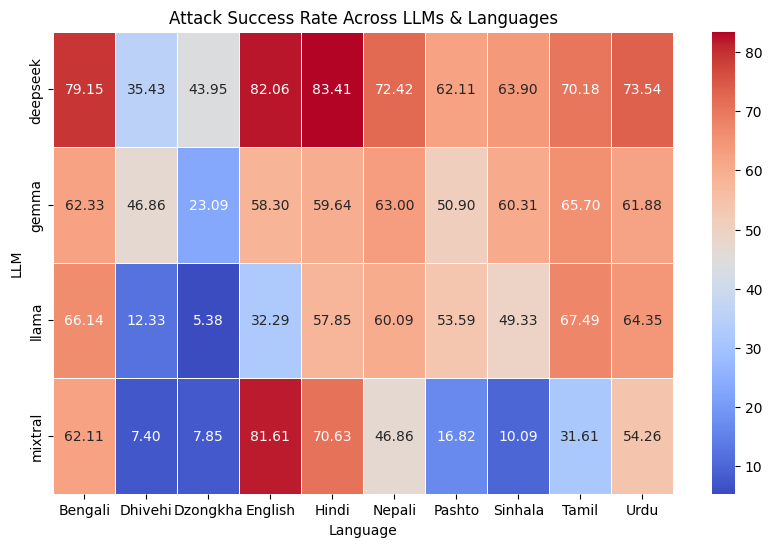

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/UBC CS/CPSC 538P Project (Computer Security)/Evaluation/Qwen/final_merged_labels.csv")
column_mapping = {
    "model": "LLM",
    "language_code": "Language",
    "cosine_similarity": "Translation_Quality",
    "label": "Jailbreak_Success",
    # Add more mappings as needed
}

# Rename the columns
df.rename(columns=column_mapping, inplace=True)
# df = df[df["Language"] != "en"]

# Updated language mapping (without countries)
languages = {
    'hi': 'Hindi',
    'ur': 'Urdu',
    'bn': 'Bengali',
    'ne': 'Nepali',
    'si': 'Sinhala',
    'ta': 'Tamil',
    'dz': 'Dzongkha',
    'dv': 'Dhivehi',
    'ps': 'Pashto',
    'en': 'English'
}
df['Language'] = df['Language'].map(languages)
# 5️⃣ 🔥 Heatmap: Jailbreak Success Rates per LLM-Language
heatmap_data = df.groupby(["LLM", "Language"])["Jailbreak_Success"].mean().unstack()
# print(heatmap_data.columns)
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data*100, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.xlabel("Language")
plt.ylabel("LLM")
plt.title("Attack Success Rate Across LLMs & Languages")
plt.show()



In [ ]:
import pandas as pd

# Assuming heatmap_data is your DataFrame
median_values = heatmap_data.median(axis=1)
max_values = heatmap_data.max(axis=1)

# Combine the results into a DataFrame for clarity
summary = pd.DataFrame({
    'Median': median_values,
    'Max': max_values
})

print(summary)


            Median       Max
LLM                         
deepseek  0.701794  0.834081
gemma     0.603139  0.656951
llama     0.578475  0.674888
mixtral   0.316143  0.706278


In [ ]:
from sklearn.linear_model import LogisticRegression
df = pd.read_csv("/content/drive/MyDrive/UBC CS/CPSC 538P Project (Computer Security)/Evaluation/Qwen/final_merged_labels.csv")
column_mapping = {
    "model": "LLM",
    "language_code": "Language",
    "cosine_similarity": "Translation_Quality",
    "label": "Jailbreak_Success",
    # Add more mappings as needed
}

# Rename the columns
df.rename(columns=column_mapping, inplace=True)
df = df[df["Language"] != "en"]
languages = {
     'hi': 'India (Hindi)',
     'ur': 'Pakistan (Urdu)',
     'bn': 'Bangladesh (Bengali)',
     'ne': 'Nepal (Nepali)',
     'si': 'Sri Lanka (Sinhala)',
     'ta': 'Sri Lanka (Tamil)',
    'dz': 'Bhutan (Dzongkha)',
    'dv': 'Maldives (Dhivehi)',
     'ps': 'Afghanistan (Pashto)'
}
languages = {
    'hi': 'Hindi',
    'ur': 'Urdu',
    'bn': 'Bengali',
    'ne': 'Nepali',
    'si': 'Sinhala',
    'ta': 'Tamil',
    'dz': 'Dzongkha',
    'dv': 'Dhivehi',
    'ps': 'Pashto',
}
df['Language'] = df['Language'].map(languages)
# Ensure your CSV has: ['LLM', 'Language', 'Translation_Quality', 'Jailbreak_Success']
# 2️⃣ Fit logistic regression for each (LLM, Language)
results = []
for (llm, lang), group in df.groupby(["LLM", "Language"]):
    model = LogisticRegression(penalty=None).fit(group[["Translation_Quality"]], group["Jailbreak_Success"])
    coef, intercept = model.coef_[0][0], model.intercept_[0]
    print(f"LLM: {llm}, Language: {lang}, Coefficient: {coef}, Intercept: {intercept}")


LLM: deepseek, Language: Bengali, Coefficient: -0.7111499275608375, Intercept: 1.9557891496714561
LLM: deepseek, Language: Dhivehi, Coefficient: -2.44525328551938, Intercept: 1.2045566782696124
LLM: deepseek, Language: Dzongkha, Coefficient: -2.0579226682114093, Intercept: 0.911849673149208
LLM: deepseek, Language: Hindi, Coefficient: 3.0571503236545947, Intercept: -1.1031522565686174
LLM: deepseek, Language: Nepali, Coefficient: -1.103724268762416, Intercept: 1.4839437942256515
LLM: deepseek, Language: Pashto, Coefficient: 0.23526179376704542, Intercept: 0.3250596063359937
LLM: deepseek, Language: Sinhala, Coefficient: -0.6880231420527623, Intercept: 0.9445286802099643
LLM: deepseek, Language: Tamil, Coefficient: 0.6826763876272772, Intercept: 0.31274924053217074
LLM: deepseek, Language: Urdu, Coefficient: -0.4821823677115505, Intercept: 1.41298045674474
LLM: gemma, Language: Bengali, Coefficient: 2.257097916413811, Intercept: -1.4663781301336696
LLM: gemma, Language: Dhivehi, Coeffic

<ipython-input-2-8b167986cc63>:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Language', y='Cosine Similarity', data=df_plot, palette="Set2")


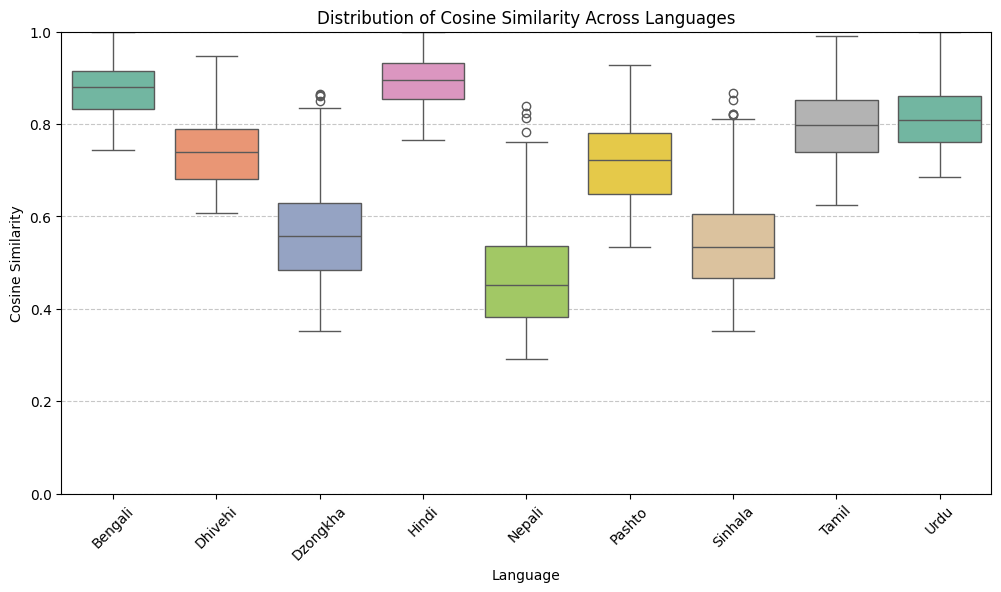

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define language codes and full names
languages = {
    'hi': 'Hindi',
    'ur': 'Urdu',
    'bn': 'Bengali',
    'ne': 'Nepali',
    'si': 'Sinhala',
    'ta': 'Tamil',
    'dz': 'Dzongkha',
    'dv': 'Dhivehi',
    'ps': 'Pashto',
}

base_path = "/content/drive/MyDrive/UBC CS/CPSC 538P Project (Computer Security)/Translated Prompt V2/Commons"
file_pattern = "{lang}_common_prompts.csv"

# Store data for box plot
data = []

for lang_code, lang_name in languages.items():
    file_path = os.path.join(base_path, file_pattern.format(lang=lang_code))

    if os.path.exists(file_path):
        df = pd.read_csv(file_path)

        if 'cosine_similarity' in df.columns:
            for value in df['cosine_similarity'].dropna():
                data.append({'Language': lang_name, 'Cosine Similarity': value})
        else:
            print(f"Skipping {lang_name}: 'cosine_similarity' column not found.")
    else:
        print(f"File not found: {file_path}")

# Convert to DataFrame
df_plot = pd.DataFrame(data)

# Sort languages alphabetically for better readability
df_plot['Language'] = pd.Categorical(df_plot['Language'], categories=sorted(languages.values()), ordered=True)

# Plot box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Language', y='Cosine Similarity', data=df_plot, palette="Set2")

plt.xlabel("Language")
plt.ylabel("Cosine Similarity")
plt.title("Distribution of Cosine Similarity Across Languages")
plt.ylim(0, 1)  # Cosine similarity ranges from 0 to 1
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


In [ ]:
import pandas as pd

# List of language codes
language_codes = ['mixed']

# Define the model
models = ["llama/llama3-70b-8192", "mixtral/mixtral-8x7b-32768","gemma/gemma", "deepseek/deepseek"]
for model in models:
# Loop through each language code and calculate the attack success rate
    for language_code in language_codes:
        # Construct the file path for the language-specific CSV
        file_path = f'/content/drive/MyDrive/UBC CS/CPSC 538P Project (Computer Security)/Evaluation/Qwen/{model}_{language_code}_labels.csv'

        # Load the CSV file
        df = pd.read_csv(file_path)

        # Remove quotation marks around the classification values, if any
        df['classification'] = df['classification'].str.replace('"', '')
        df['classification'] = df['classification'].str.replace('[', '')
        df['classification'] = df['classification'].str.replace(']', '')
        df['classification'] = df['classification'].str.replace('\'', '')
        # Count occurrences of 'following' and 'refusal'
        total_count = len(df)
        null_count = df['classification'].isna().sum()
        # print(null_count)
        following_count = df[df['classification'].str.contains('follow', na=False) & (df['classification'] != '')].shape[0]


        # Calculate the attack success rate
        attack_success_rate = (following_count / total_count) * 100

        # Print the attack success rate for this language
        print(f"Attack Success Rate for {language_code}, {model}: {attack_success_rate:.2f}%")

Attack Success Rate for mixed, llama/llama3-70b-8192: 66.14%
Attack Success Rate for mixed, mixtral/mixtral-8x7b-32768: 59.19%
Attack Success Rate for mixed, gemma/gemma: 66.82%
Attack Success Rate for mixed, deepseek/deepseek: 80.04%


Find out how multi-lingual prompts resulted in jailbreaking

In [ ]:
import pandas as pd

# List of language codes
language_codes = ['mixed']

# Define the model
df_list= []
models = ["llama/llama3-70b-8192", "mixtral/mixtral-8x7b-32768","gemma/gemma", "deepseek/deepseek"]
for model in models:
# Loop through each language code and calculate the attack success rate
    for language_code in language_codes:
        # Construct the file path for the language-specific CSV
        file_path = f'/content/drive/MyDrive/UBC CS/CPSC 538P Project (Computer Security)/Evaluation/Qwen/{model}_{language_code}_labels.csv'

        # Load the CSV file
        df = pd.read_csv(file_path)

        df['classification'] = df['classification'].str.replace('"', '')
        df['classification'] = df['classification'].str.replace('[', '')
        df['classification'] = df['classification'].str.replace(']', '')
        df['classification'] = df['classification'].str.replace('\'', '')
        # Assign label 1 if classification is "following", else 0
        df['label'] = (df['classification'].notna() & df['classification'].str.contains("follow", na=False)).astype(int)#(df['classification'] == "following").astype(int)
        df['LLM'] = model.split('/')[0]

        # Append to the list
        df_list.append(df)

# Concatenate all dataframes
label_df = pd.concat(df_list, ignore_index=True)

How many prompts are not jailbroken using any of the nine South-Asian languages?

In [ ]:
import pandas as pd

# Load the CSV
df = pd.read_csv("/content/drive/MyDrive/UBC CS/CPSC 538P Project (Computer Security)/Evaluation/Qwen/final_merged_labels.csv")
column_mapping = {
    "model": "LLM",
    "language_code": "Language",
    "cosine_similarity": "Translation_Quality",
    "label": "Jailbreak_Success",
    # Add more mappings as needed
}

# Rename the columns
df.rename(columns=column_mapping, inplace=True)
df = df[df["Language"] != "en"]
# Group by LLM and id, then check if all 9 languages have Jailbreak_Success = 0
zero_jailbreak_ids = df.groupby(["LLM", "id"])["Jailbreak_Success"].sum()
zero_jailbreak_ids = zero_jailbreak_ids[zero_jailbreak_ids == 0].index

# Convert to DataFrame for clarity
result_df = pd.DataFrame(zero_jailbreak_ids.tolist(), columns=["LLM", "id"])

# Display the result
print(len(result_df))


272


How many prompts were effective in jailbreaking in multi-lingual setting that were unsuccessful with any of the 9 South-Asian languages?

In [ ]:
merged_df = result_df.merge(label_df, on=["LLM", "id"], how="left")
# Filter rows where label equals 1
rows_with_label_1 = merged_df[merged_df["label"] == 1]

# Display the filtered rows
print(len(rows_with_label_1))

16


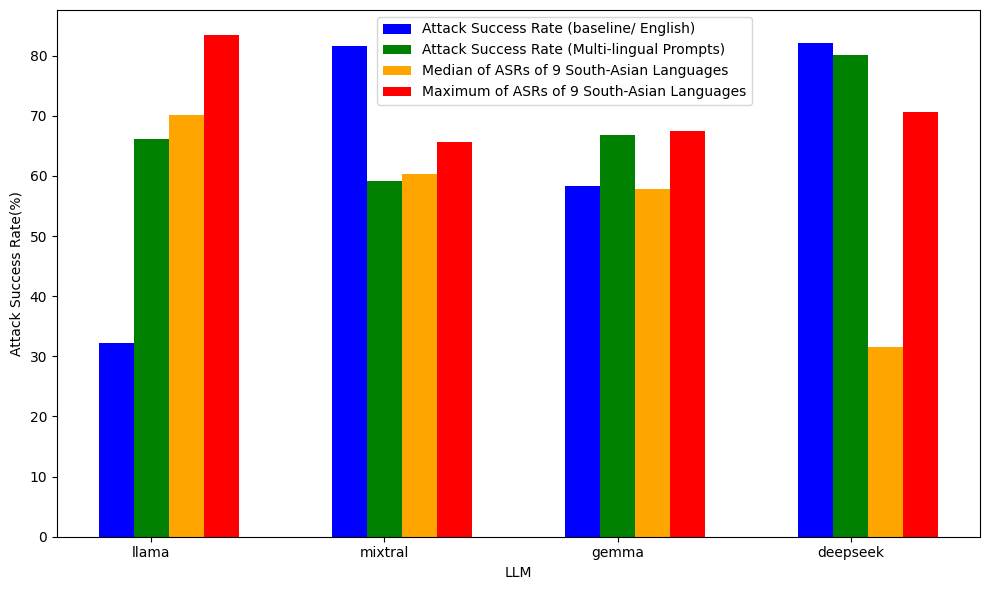

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data for Attack Success Rates
llms = ['llama', 'mixtral', 'gemma', 'deepseek']
attack_success_rate_en = [32.29, 81.61, 58.30, 82.06]
attack_success_rate_mixed = [66.14, 59.19, 66.82, 80.04]

# Data for Median and Max
median_values = [0.701794, 0.603139, 0.578475, 0.316143]
max_values = [0.834081, 0.656951, 0.674888, 0.706278]

# Convert median and max to percentages
median_values = [value * 100 for value in median_values]
max_values = [value * 100 for value in max_values]

# Create a bar chart
x = np.arange(len(llms))  # The label locations

fig, ax = plt.subplots(figsize=(10, 6))

# Bar positions
width = 0.15  # Width of the bars

# Plotting Attack Success Rates
ax.bar(x - width, attack_success_rate_en, width, label='Attack Success Rate (baseline/ English)', color='b')
ax.bar(x, attack_success_rate_mixed, width, label='Attack Success Rate (Multi-lingual Prompts)', color='g')

# Plotting Median and Max values
ax.bar(x + width, median_values, width, label='Median of ASRs of 9 South-Asian Languages', color='orange')
ax.bar(x + 2*width, max_values, width, label='Maximum of ASRs of 9 South-Asian Languages', color='red')

# Labeling and Formatting
ax.set_xlabel('LLM')
ax.set_ylabel('Attack Success Rate(%)')
# ax.set_title('Attack Success Rate and Median/Max Values for Different LLMs')
ax.set_xticks(x)
ax.set_xticklabels(llms)
ax.legend(loc='upper center', bbox_to_anchor=(0.55, 1)) # Place the legend in the upper-right corner inside the plot

# Display the plot
plt.tight_layout()
plt.show()


### European Language

In [2]:
import pandas as pd

# List of language codes
language_codes = ['fr', 'de', 'es']

# Define the model
models = ["llama/llama3-70b-8192", 'mixtral/mixtral-8x7b-32768']
for model in models:
# Loop through each language code and calculate the attack success rate
    for language_code in language_codes:
        # Construct the file path for the language-specific CSV
        file_path = f'/content/drive/MyDrive/CPSC 538P Project (Computer Security)/Evaluation/Qwen/{model}_{language_code}_labels.csv'

        # Load the CSV file
        df = pd.read_csv(file_path)

        # Remove quotation marks around the classification values, if any
        df['classification'] = df['classification'].str.replace('"', '')
        df['classification'] = df['classification'].str.replace('[', '')
        df['classification'] = df['classification'].str.replace(']', '')
        df['classification'] = df['classification'].str.replace('\'', '')
        # Count occurrences of 'following' and 'refusal'
        total_count = len(df)
        null_count = df['classification'].isna().sum()
        # print(null_count)
        following_count = df[df['classification'].str.contains('follow', na=False) & (df['classification'] != '')].shape[0]


        # Calculate the attack success rate
        attack_success_rate = (following_count / total_count) * 100

        # Print the attack success rate for this language
        print(f"Attack Success Rate for {language_code}, {model}: {attack_success_rate:.2f}%")

Attack Success Rate for fr, llama/llama3-70b-8192: 42.83%
Attack Success Rate for de, llama/llama3-70b-8192: 42.38%
Attack Success Rate for es, llama/llama3-70b-8192: 40.81%
Attack Success Rate for fr, mixtral/mixtral-8x7b-32768: 82.74%
Attack Success Rate for de, mixtral/mixtral-8x7b-32768: 81.17%
Attack Success Rate for es, mixtral/mixtral-8x7b-32768: 82.51%
